In [64]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/rupak-1/ML-project/main/Mother%20Jones%20-%20Mass%20Shootings%20Database%2C%201982%20-%202019.csv"
df = pd.read_csv(url)


In [65]:
# Select relevant features for clustering
features = ['fatalities', 'injured', 'total_victims', 'age_of_shooter', 'latitude', 'longitude']

# Extract selected features
X = df[features]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-66-0ccd9f93d845>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


                                      case                location      date  \
23             Oxford High School shooting        Oxford, Michigan  11/30/21   
24                   San Jose VTA shooting    San Jose, California   5/26/21   
25                FedEx warehouse shooting   Indianapolis, Indiana   4/15/21   
26          Orange office complex shooting      Orange, California   3/31/21   
27            Boulder supermarket shooting       Boulder, Colorado   3/22/21   
..                                     ...                     ...       ...   
143        Shopping centers spree killings       Palm Bay, Florida   4/23/87   
144  United States Postal Service shooting        Edmond, Oklahoma   8/20/86   
145         San Ysidro McDonald's massacre  San Ysidro, California   7/18/84   
146              Dallas nightclub shooting           Dallas, Texas   6/29/84   
147                  Welding shop shooting          Miami, Florida   8/20/82   

                                       

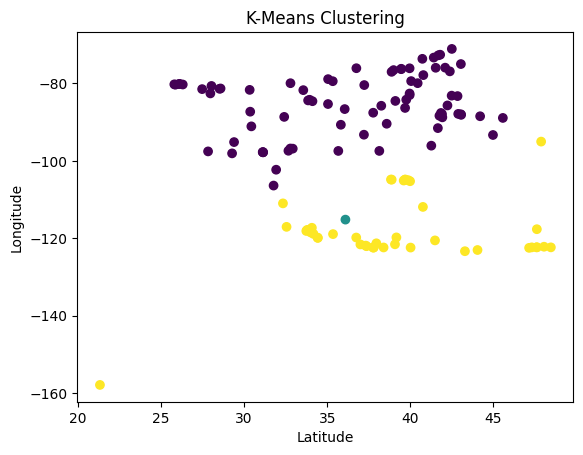

In [66]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Handle missing values and convert non-numeric values to numeric
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=features)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df[features])

# Choose the number of clusters (you may need to tune this based on your data)
num_clusters = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the standardized data
kmeans.fit(X_standardized)

# Add cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

# Print the DataFrame with cluster labels
print(df)

# Visualize the clusters (for 2D data)
plt.scatter(df['latitude'], df['longitude'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


Mean Squared Error: 9.693522803355793e-29


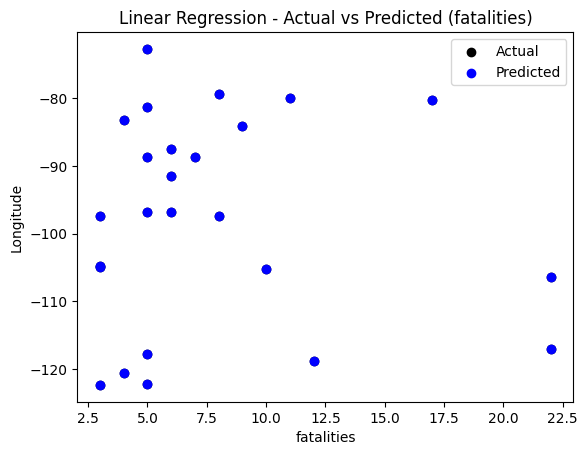

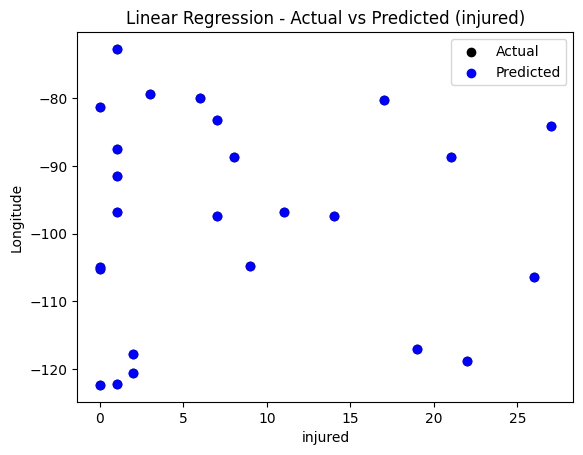

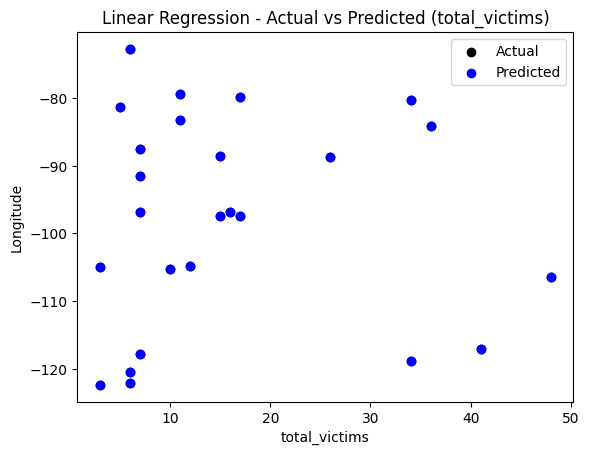

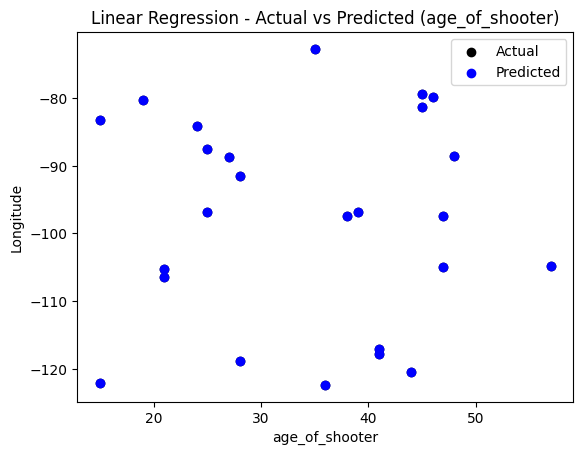

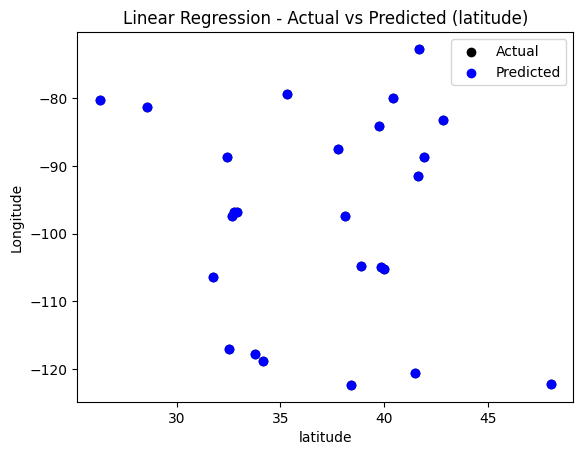

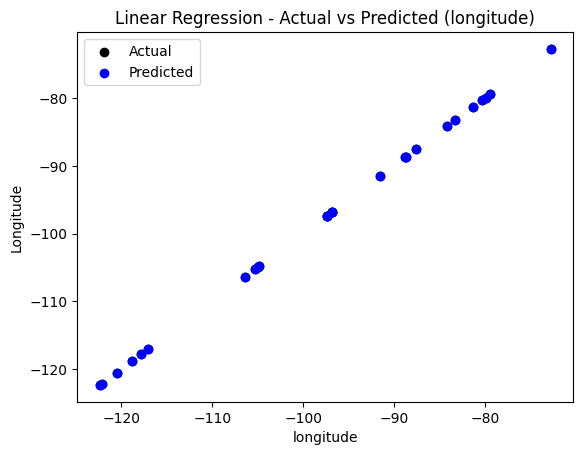

In [38]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df, features, and target are already defined from the previous cell

# Define the target variable
target = 'longitude'  # Adjust the target variable based on your needs

# Handle missing values and convert non-numeric values to numeric
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df[target] = pd.to_numeric(df[target], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=features + [target])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the predictions for each feature
for feature in features:
    plt.scatter(X_test[feature], y_test, color='black', label='Actual')
    plt.scatter(X_test[feature], y_pred, color='blue', label='Predicted')
    plt.xlabel(feature)
    plt.ylabel('Longitude')
    plt.legend()
    plt.title(f'Linear Regression - Actual vs Predicted ({feature})')
    plt.show()


<ipython-input-85-9ede97c92378>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(github_url, error_bad_lines=False)
<ipython-input-85-9ede97c92378>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[selected_columns].corr()


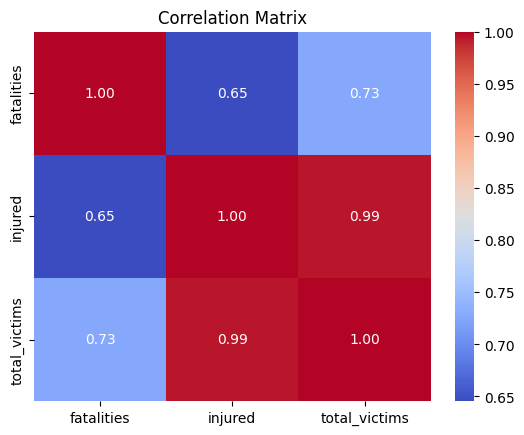

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# GitHub raw URL for the CSV file
github_url = 'https://raw.githubusercontent.com/rupak-1/ML-project/main/Mother%20Jones%20-%20Mass%20Shootings%20Database%2C%201982%20-%202019.csv'

# Load the dataset with additional parameters to handle format issues
df = pd.read_csv(github_url, error_bad_lines=False)

# Select relevant columns for correlation analysis
selected_columns = ['fatalities', 'injured', 'total_victims', 'age_of_shooter']

# Calculate correlation matrix
correlation_matrix = df[selected_columns].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
